<table class='center'>
    <tr style="background-color:white">
      <td>
          <center><h1> To Predict whether Question Asked on Quora are Sincere or Insincere</h1></center>
          <hr>
          <center><h2>Interestship 5.0 by Clique Community</h2></center>
          <hr>
          <center><h3>Mentee Name: Anubha Sharma</h3></center>
      </td>
     </tr>
</table>

#### Understanding the Project First
<ul>
    <li>An Insincere question is defined as Questios Intended to make a statement rather than look for helpful answers</li>
</ul>

#### Some Characteristics that can Signify that a Question is Insincere:
<ol>
    <li>Has a Non Neutral Tone:
        <ul>
            <li>Has an exaggerated tone to underscore a point about a group of people</li>
            <li>Is rhetorical and meant to imply a statement about a group of people</li>
        </ul>
        <br>
    <li>Is disparaging or inflammatory:
        <ul>
            <li>Suggests a discriminatory idea against a protected class of people, or seeks confirmation of a stereotype</li>
            <li>Makes disparaging attacks/insults against a specific person or group of people</li>
            <li>Based on an outlandish premise about a group of people</li>
            <li>Disparages against a characteristic that is not fixable and not measurable</li>  
        </ul>
        <br>
    <li>Isn't grounded in reality:
        <ul>
            <li>Based on false information, or contains absurd assumptions</li>
        </ul>
        <br>
</ol>

#### About the Data Set
<ul>
    <li>The training data includes the question that was asked, and whether it was identified as insincere (target = 1).</li>
    <li>The ground-truth labels contain some amount of noise: they are not guaranteed to be perfect.</li>
</ul>
    

In [2]:
#Importing the basic Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the CSV File

data=pd.read_csv('train.csv')
data

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


#### Basics Insights about the Dataset

In [4]:
data.describe()

,target
count,1.306122e+06
mean,6.187018e-02
std,2.409197e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [6]:
print(data.shape)

(1306122, 3)


#### Dataset has more than 13 Lakh rows and 3 colums

#### The columns are :
>qid - unique question identifier

>question_text - Quora question text

>target - a question labeled "insincere" has a value of 1, otherwise 0

### What is NLP (Natural Language Processing)?
<ul>
    <li>NLP is a subfield of computer science and artificial intelligence concerned with interactions between computers and human (natural) languages. It is used to apply machine learning algorithms to text and speech.</li></ul>
<ol>Examples of NLP:
    <ol>
        <li>Speech Recognition</li>
        <li>Document Summarization</li>
        <li>Machine Translation</li>
    </ol>
</ol>

## Text Preprocessing

#### In NLP, text preprocessing is the first step in the process of building a model.

### Step 1: Punctutation Removal


In [7]:
import string
string.punctuation

def removing_punctuation(text):
    ptfree="".join([i for i in text if i not in string.punctuation])
    return ptfree
#storing the puntuation free text
data['cleaned_ques']= data['question_text'].apply(lambda x:removing_punctuation(x))
data.head()


,qid,question_text,target,cleaned_ques
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,How did Quebec nationalists see their province...
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,Do you have an adopted dog how would you encou...
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,Why does velocity affect time Does velocity af...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,How did Otto von Guericke used the Magdeburg h...
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,Can I convert montra helicon D to a mountain b...


### Step 2: Lowering Text

>Converting a word to lower case (NLP -> nlp).
Words like Book and book mean the same but when not converted to the lower case those two are represented as two different words in the vector space model (resulting in more dimensions).


In [8]:
data['ques_lower']= data['cleaned_ques'].apply(lambda x: x.lower())


### Step 3: Tokenization

>NLTK contains a module called tokenize() which further classifies into two sub-categories: Sentence Tokenization and Word Tokenization.<ul><li>NLTK — The Natural Language ToolKit is one of the best-known and most-used NLP libraries, useful for all sorts of tasks from tokenization, stemming, tagging, parsing, and beyond</li>
</ul>


>Tokenization is the process of tokenizing or splitting a string, text into a list of tokens.</li>

><ul>Text into sentences tokenization
> <li>Sentences into words tokenization</li>
> <li>Sentence Tokenization - We use the sent_tokenize() method to split a document or paragraph into sentences</li>
 </ul>

<ul><li>
Punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.
    </li></ul>

<ul><li>
NLTK — The Natural Language ToolKit is one of the best-known and most-used NLP libraries, useful for all sorts of tasks from tokenization, stemming, tagging, parsing, and beyond</li>
</ul>


In [9]:
#Installing all the required packages
!pip install nltk
!pip install spacy

In [10]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenization(text):
    tokens = word_tokenize(text)
    return tokens
#applying function to the column
data['ques_tokenized']= data['ques_lower'].apply(lambda x: tokenization(x))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Step 4: Stop Words Removal

>Stop words are very commonly used words (a, an, the, etc.) in the documents. These words do not really signify any importance as they do not help in distinguishing two documents.


In [11]:
import nltk
import spacy
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

data['no_stopwords']= data['ques_tokenized'].apply(lambda x:remove_stopwords(x))
data['no_stopwords'][0]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['quebec', 'nationalists', 'see', 'province', 'nation', '1960s']

### Step 5: Lemmatization

<ul><li>Lemmatization reduces the words to a word existing in the language.</li></ul>


In [12]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  lemm_text=" ".join(lemm_text)
  return lemm_text

data['ques_lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))
data['ques_lemmatized'][0]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'quebec nationalist see province nation 1960s'

In [13]:
preprocessed_data= data[['qid','question_text','ques_lemmatized','target']]
preprocessed_data.to_csv('quora_preprocessed.csv',index=False)

<center><h1>Task-1</h1>
<hr>
    <h2>Exploratory Data Analysis</h2>
    </center>


In [14]:
!pip install wordcloud

In [15]:
preprocessed_data.head()

,qid,question_text,ques_lemmatized,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,quebec nationalist see province nation 1960s,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",adopted dog would encourage people adopt shop,0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,velocity affect time velocity affect space geo...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,otto von guericke used magdeburg hemisphere,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,convert montra helicon mountain bike changing ...,0


In [63]:
preprocessed_data.describe()

,target
count,1.306122e+06
mean,6.187018e-02
std,2.409197e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [17]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   qid              1306122 non-null  object
 1   question_text    1306122 non-null  object
 2   ques_lemmatized  1306122 non-null  object
 3   target           1306122 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [18]:
preprocessed_data.isna().sum()

qid                0
question_text      0
ques_lemmatized    0
target             0
dtype: int64

In [19]:
preprocessed_data["target"].value_counts() 

0    1225312
1      80810
Name: target, dtype: int64

In [20]:
#Text Word startistics: min.mean, max and interquartile range
# This is mainly done to find out more about the Text Length

txt_length = preprocessed_data.ques_lemmatized.str.split().str.len()
txt_length.describe()

count    1.306122e+06
mean     6.532933e+00
std      3.741741e+00
min      0.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      8.000000e+00
max      7.700000e+01
Name: ques_lemmatized, dtype: float64

In [21]:
# Defining Sincere and Insincere Words
sincere_words = preprocessed_data[preprocessed_data['target']==0]['ques_lemmatized']
insincere_words = preprocessed_data[preprocessed_data['target']==1]['ques_lemmatized'] 

<center><h1 style="color:Blue;">Graph-1: See the distribution of Target Value in DataSet</h1></center>


<Axes: ylabel='target'>

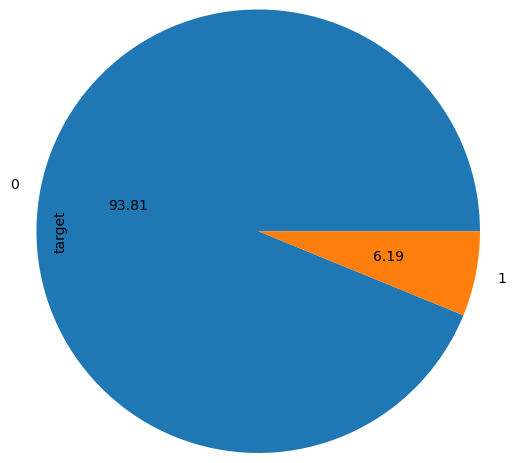

In [22]:
preprocessed_data["target"].value_counts().plot(kind="pie",autopct='%0.2f',radius=1.5)

<center><h3 style="color:red;">From the graph we can conclude that the data is highly imbalanced with 93.81 % of Sincere Data and Only 6.19% of Insincere Data</h3></center><hr>
<ul><h3><li>Target1: Insincere Data</li></h3>
        <h3><li>Target0: Sincere Data</li></h3>
    </ul>
    
<center><h1 style="color:Blue;">Graph-2: Word Cloud</h1></center>
<hr>
<h1> What is a Word Cloud?</h1>
<ul>
    <li><h4>A word cloud is a collection, or cluster, of words depicted in different sizes.</h4></li>
    <li><h4>The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.</h4></li>
    </ul>


F:\interestship_5.0\env\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


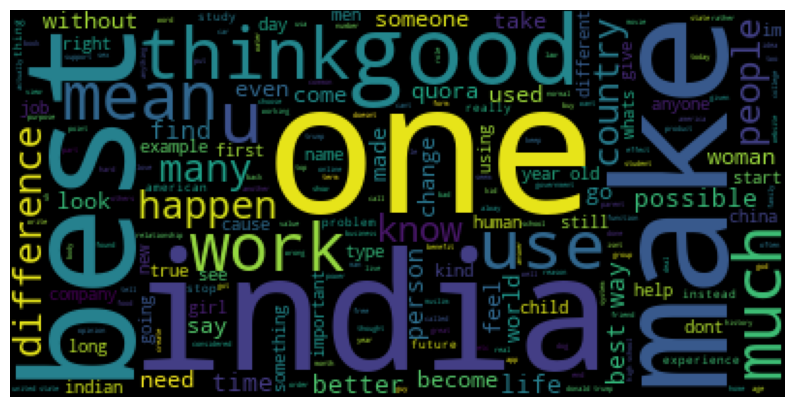

In [53]:
from wordcloud import WordCloud, STOPWORDS
# initialize the word cloud

wordcloud = WordCloud( background_color='black', width=400, height=200)
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(preprocessed_data['ques_lemmatized']))

# plotting the word cloud
plt.figure(figsize=(10,20))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()


<center><h2>Word Cloud-1: All the words present in the DataSet</h2></center>
<h3> Conclusion from Word Cloud-1</h3>
<ol>Some of the maximum used words in the dataset are:
    <li>india</li>
    <li>one</li>
    <li>make</li>
    <li>best</li>
</ol>

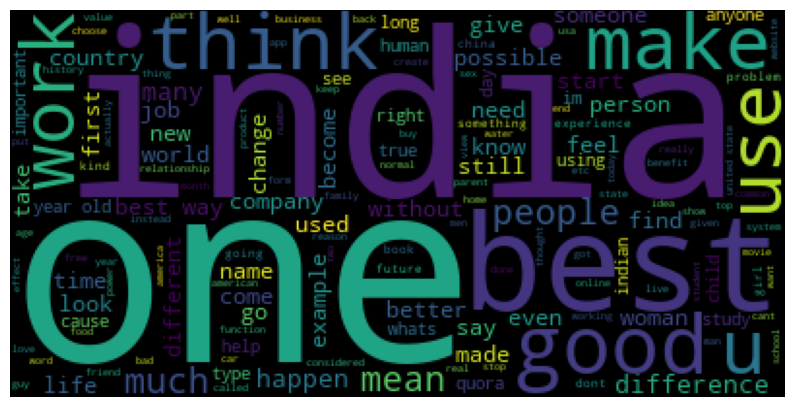

In [24]:
sincere_word = ' '.join(sincere_words) 
wc = wordcloud.generate(sincere_word)
plt.figure(figsize=(10,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

<center><h2>Word Cloud-2: All the Sincere words present in the DataSet</h2></center>
<h3> Conclusion from Word Cloud-2</h3>
<ol>Some of the maximum used words in the dataset are:
    <li>one</li>
    <li>india</li>
    <li>good</li>
    <li>best</li>
</ol>

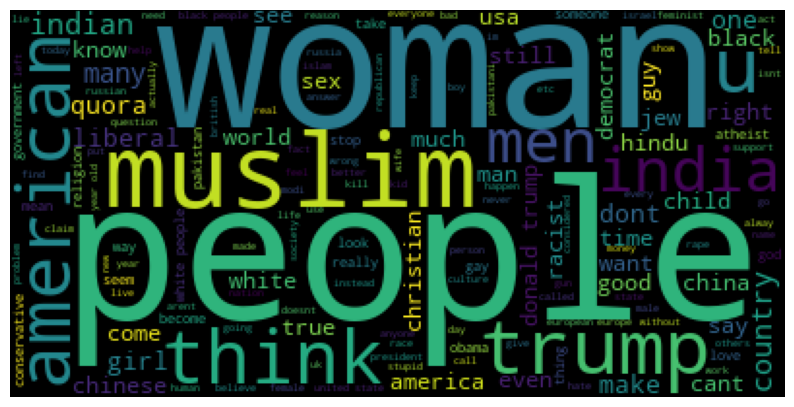

In [25]:
insincere_word = ' '.join(insincere_words) 
wc = wordcloud.generate(insincere_word)
plt.figure(figsize=(10,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

<center><h2>Word Cloud-3: All the Insincere words present in the DataSet</h2></center>
<h3> Conclusion from Word Cloud-3</h3>
<ol>Some of the maximum used words in the dataset are:
    <li>women</li>
    <li>people</li>
    <li>muslim</li>
    <li>trump</li>
</ol>
<center><h1 style="color:Blue;">Graph-3: Frequency of Top 20 Words in the DataSet</h1></center>
<h2> What is Count Vectorizer</h2>
<ul><li>CountVectorizer is a great tool provided by the scikit-learn library in Python.</li>
<li>It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.</li>
    <li>This functionality makes it a highly flexible feature representation module for text.</li>
    <hr>
    <li><h3>Bag Of Words:</h3></li><br>
    Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.
    </ul>

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]

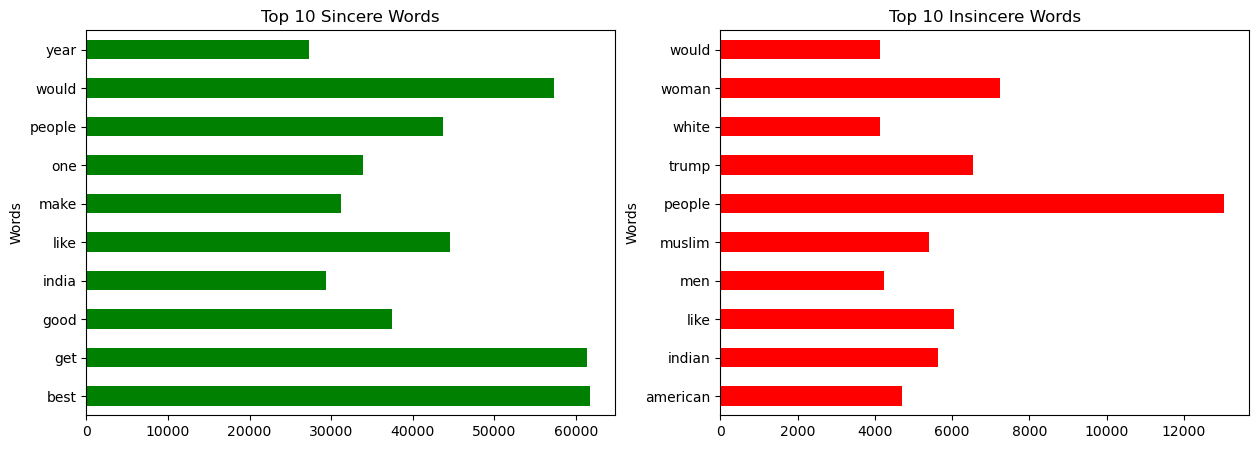

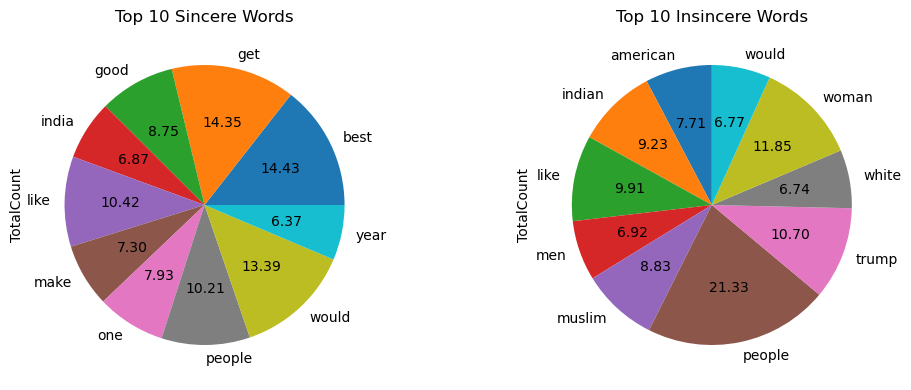

In [27]:
fig =plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
plot_2=get_top_n_words(sincere_words,10)
all_sincere_words=pd.DataFrame(plot_2,columns=['Words','TotalCount'])
all_sincere_words.groupby('Words').sum()['TotalCount'].plot.barh(color='green')
plt.title("Top 10 Sincere Words")

plt.subplot(1, 2, 2)
plot_3=get_top_n_words(insincere_words,10)
all_insincere_words=pd.DataFrame(plot_3,columns=['Words','TotalCount'])
all_insincere_words.groupby('Words').sum()['TotalCount'].plot.barh(color='red')
plt.title("Top 10 Insincere Words")
plt.show()

fig =plt.figure(figsize = (12,10))
plt.subplot(2, 2, 1)
plot_2=get_top_n_words(sincere_words,10)
all_sincere_words=pd.DataFrame(plot_2,columns=['Words','TotalCount'])
all_sincere_words.groupby('Words').sum()['TotalCount'].plot(kind="pie",autopct='%0.2f')
plt.title("Top 10 Sincere Words")

plt.subplot(2, 2, 2)
plot_3=get_top_n_words(insincere_words,10)
all_insincere_words=pd.DataFrame(plot_3,columns=['Words','TotalCount'])
all_insincere_words.groupby('Words').sum()['TotalCount'].plot(kind="pie",autopct='%0.2f',startangle = 90)
plt.title("Top 10 Insincere Words")
plt.show()